In [1]:
from qtpg.team import Team
from qtpg.learner import Learner
from qtpg.program import Program
from qtpg.rule import Rule
from qtpg.figure13 import Figure13
from qtpg.figure13_hole_in_wall import Figure13HoleInWall
from qtpg.figure12 import Figure12
from qtpg.figure9 import Figure9
from qtpg.figureRandom import FigureRandom
from qtpg.figureHeywood import FigureHeywood
from qtpg.search_manager import SearchManager
import numpy as np
import uuid
import copy
import matplotlib.pyplot as plt

In [2]:
gp_query_env = 0
rl_query_env = 0

In [3]:
# env params
memorySize = 40
legalMove = 0.1
illegalMove = -0.01
outOfBounds = 0.0
memoryRepeat = -0.01
# memoryRepeat = 0.0
goalReached = 100

# envName = 'Figure 13'
# env = Figure13(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 13 Hole in Wall'
# env = Figure13HoleInWall(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 12'
# env = Figure12(5, 5, (4, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
envName = 'Figure 9'
env = Figure9(10, 10, (4, 9), (0, 3), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Heywood'
# env = FigureHeywood(10, 10, (4, 4), (0, 4), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Random'
# env = FigureRandom(20, 20, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# env.shake(0.2)

In [4]:
# env.save()
# env.load('c17003da-39f3-40c2-adfb-a75dbbdf6643')

In [5]:
numGens = 200
# maxTeamPool = 5
maxTeamPool = 10
runs = 1
# init search manager and starting teams

# searchManager = SearchManager(maxTeamPool)

# variables for tracking fitness, for curves
scores = []
gens = []
maxes = []
averages = []
mins = []

run_winners = []
runs_score_track = []

for run in range(runs):
    maxes = []
    averages = []
    mins = []
    gens = []
    print(run)
    # init everything for new run
    searchManager = SearchManager(maxTeamPool)
    
    adam_and_eve = []
    env.reset()
    init_team = Team(uuid.uuid4(), 0, 0, 1, 1, 0)
    init_team.init_search(env, [2, 3])
#     adam_and_eve.append(init_team)
#     init_team = Team(uuid.uuid4(), 0, 0, 1, 1, 0)
#     init_team.init_search(env, [0, 1])
    adam_and_eve.append(init_team)
    win = False
    for adam in adam_and_eve:
        data = [adam, win]
        searchManager.evaluate_team(data)
    
    
    average_coverage = 0.0
    gen = 0
    for gen in range(numGens):
#     while (average_coverage < 0.7) and (len(searchManager.winners) < maxTeamPool):
        print(average_coverage)
        print('winners so far:')
        print(searchManager.winners)
        print(f'GEN --> {gen}')
        gen += 1
        toEvaluateAfterGen = []
        scores = []
        # get it started
        for parent in searchManager.teamPool:
            # only run if the team has not yet won
            if parent not in searchManager.winners:
                env.current_state = parent.start_state

                # make offspring from parent, then let that offspring make a new rule
                child = copy.deepcopy(parent)
                child.gp_query_env = parent.gp_query_env # probably don't need this, can test later
                child.id = uuid.uuid4()
                win = child.search_no_back_track(env)
                
                if child.mostRecent.program.rule.region[3] - child.mostRecent.program.rule.region[2] >= 0:
                    gp_query_env += (child.mostRecent.program.rule.region[3] - child.mostRecent.program.rule.region[2]) + 1
                toEvaluateAfterGen.append([child, win])
                scores.append(child)
            else:
                scores.append(parent)

        for data in toEvaluateAfterGen:
            searchManager.evaluate_team(data)
        # start: manage fitness curves (at end of gen)
        gens.append(gen)
        total = 0
        max_fitness = -100
        min_fitness = 100

        for team in scores:
            total += team.fitness
            if team.fitness > max_fitness:
                max_fitness = team.fitness
            if team.fitness < min_fitness:
                min_fitness = team.fitness
        average_fitness = total / len(searchManager.teamPool)
        maxes.append(max_fitness)
        averages.append(average_fitness)
        mins.append(min_fitness)
        
        # find average region coverage
        total_coverage = 0.0
        for team in searchManager.teamPool:
            total_coverage += team.coverage([env.rows, env.cols])
        average_coverage = total_coverage / len(searchManager.teamPool)

    runs_score_track.append({'run': run, 'maxes': maxes, 'averages': averages, 'mins': mins})
    
    run_winners.append({'run': run, 'winners': searchManager.winners})

0
0.0
winners so far:
[]
GEN --> 0
------
8
[1, 4, 0, 3]
------
[1, 4, 0, 3]
0.02
winners so far:
[]
GEN --> 1
------
11
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
6
[0, 1, 0, 4]
------
[0, 1, 0, 4]
0.05500000000000001
winners so far:
[]
GEN --> 2
------
20
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
6
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
9
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
7
[1, 3, 0, 3]
------
[1, 3, 0, 3]
0.08125
winners so far:
[]
GEN --> 3
------
11
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
6
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
7
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
8
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
5
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
9
[0, 0, 0, 4]
------
[0, 0, 0, 4]
0.12400000000000003
winners so far:
[]
GEN --> 4
------
5
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
9
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
8
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
7
[0, 3, 0, 4]
------
[0, 3, 0

------
11
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
12
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
12
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
10
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
6
[1, 2, 0, 3]
------
[1, 2, 0, 3]
------
8
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
0.562
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>]
GEN --> 28
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
8
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
12
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
10
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
12
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
0.5680000000000001
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>]
GEN --> 29
------
10
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
9
[0, 6, 0, 5]
-

------
12
[0, 7, 0, 5]
------
[0, 7, 0, 5]
0.67
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>]
GEN --> 49
------
6
[0, 7, 7, 9]
------
[0, 7, 7, 9]
------
11
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
8
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
8
[1, 9, 6, 9]
------
[1, 9, 6, 9]
------
7
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
17
[1, 0, 0, 9]
------
[1, 0, 0, 9]
0.674
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>]
GEN --> 50
------
20
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
6
[0, 8, 7, 9]
------
[0, 8, 7, 9]
------
10
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
10
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
16
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
18
[1, 7, 0, 9]
------
[1, 7, 0, 9]
0.6699999999999999
winners so far:
[

------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
18
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
14
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
0.6990000000000001
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>]
GEN --> 69
------
8
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
4
[0, 7, 7, 9]
------
[0, 7, 7, 9]
------
8
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
10
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
7
[0, 1, 0, 4]
------
[0, 1, 0, 4]
0.7000000000000001
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>]
GEN --> 70
------
12
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
12


------
10
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
7
[0, 1, 0, 4]
------
[0, 1, 0, 4]
0.7050000000000002
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>]
GEN --> 89
------
8
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
no steps!
------
2
[1, 6, 9, 9]
------
[1, 6, 9, 9]
------
12
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
12
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
19
[1, 1, 0, 9]
------
[1, 1, 0, 9]
0.7000000000000001
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>]
GEN --> 90
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
10
[1, 5, 5, 9]
------
[1, 5, 5, 9]
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
12
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
11
[0, 6, 0, 5]
------
[0, 6, 0, 

------
19
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
0.7090000000000001
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>, <qtpg.team.Team object at 0x7fd454902af0>]
GEN --> 110
no steps!
------
2
[1, 6, 9, 9]
------
[1, 6, 9, 9]
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
8
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
18
[1, 1, 0, 9]
------
[1, 1, 0, 9]
0.7090000000000001
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>, <qtpg.team.Team object at 0x7fd454902af0>]
GEN --> 111
------
20
[1, 1, 0, 9]
------
[1, 1, 0, 9]
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 

------
12
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
7
[0, 8, 0, 5]
------
[0, 8, 0, 5]
------
15
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
7
[1, 2, 5, 9]
------
[1, 2, 5, 9]
0.769
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>, <qtpg.team.Team object at 0x7fd454902af0>, <qtpg.team.Team object at 0x7fd454a9e880>, <qtpg.team.Team object at 0x7fd4548f5070>]
GEN --> 133
------
11
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
10
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
13
[0, 9, 0, 9]
------
[0, 9, 0, 9]
------
9
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
9
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
19
[1, 0, 0, 9]
------
[1, 0, 0, 9]
0.769
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>, <qtpg.team.Team object at 0x7fd454902af0>, 

------
15
[1, 7, 0, 9]
------
[1, 7, 0, 9]
------
9
[0, 8, 0, 5]
------
[0, 8, 0, 5]
0.769
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>, <qtpg.team.Team object at 0x7fd454902af0>, <qtpg.team.Team object at 0x7fd454a9e880>, <qtpg.team.Team object at 0x7fd4548f5070>]
GEN --> 148
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
4
[0, 3, 6, 7]
------
[0, 3, 6, 7]
------
8
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
10
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
8
[1, 9, 6, 9]
------
[1, 9, 6, 9]
0.77
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>, <qtpg.team.Team object at 0x7fd454902af0>, <qtpg.team.Team object at 0x7fd454a9e880>, <qtpg.team.Team object at 0x7fd4548f5070>]
GEN

------
9
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
20
[1, 0, 0, 9]
------
[1, 0, 0, 9]
0.776
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>, <qtpg.team.Team object at 0x7fd454902af0>, <qtpg.team.Team object at 0x7fd454a9e880>, <qtpg.team.Team object at 0x7fd4548f5070>, <qtpg.team.Team object at 0x7fd454a003a0>]
GEN --> 162
------
6
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
7
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
17
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
9
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
8
[1, 2, 5, 9]
------
[1, 2, 5, 9]
0.776
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>, <qtpg.team.Team object at 0x7fd454902af0>, <qtpg.team.Team object at 0x7fd454a9e880>, <qtpg.team.Team object at 0x7fd4548f5070>, <

------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
7
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
9
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
4
[0, 4, 0, 1]
------
[0, 4, 0, 1]
------
15
[1, 1, 0, 9]
------
[1, 1, 0, 9]
0.776
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>, <qtpg.team.Team object at 0x7fd454902af0>, <qtpg.team.Team object at 0x7fd454a9e880>, <qtpg.team.Team object at 0x7fd4548f5070>, <qtpg.team.Team object at 0x7fd454a003a0>]
GEN --> 177
------
10
[0, 1, 0, 4]
------
[0, 1, 0, 4]
------
7
[1, 3, 0, 3]
------
[1, 3, 0, 3]
------
6
[1, 4, 0, 3]
------
[1, 4, 0, 3]
------
16
[1, 0, 0, 9]
------
[1, 0, 0, 9]
------
4
[0, 4, 0, 1]
------
[0, 4, 0, 1]
0.776
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>, <q

------
7
[0, 2, 0, 4]
------
[0, 2, 0, 4]
------
10
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
11
[0, 6, 0, 5]
------
[0, 6, 0, 5]
------
12
[1, 0, 0, 9]
------
[1, 0, 0, 9]
0.772
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>, <qtpg.team.Team object at 0x7fd454902af0>, <qtpg.team.Team object at 0x7fd454a9e880>, <qtpg.team.Team object at 0x7fd4548f5070>, <qtpg.team.Team object at 0x7fd454a003a0>]
GEN --> 191
------
11
[0, 7, 0, 5]
------
[0, 7, 0, 5]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
------
6
[0, 3, 0, 4]
------
[0, 3, 0, 4]
------
7
[1, 4, 5, 9]
------
[1, 4, 5, 9]
------
10
[0, 5, 0, 7]
------
[0, 5, 0, 7]
------
7
[1, 3, 5, 9]
------
[1, 3, 5, 9]
0.772
winners so far:
[<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>, <

In [6]:
#fitness curves
# x = []
# y = []
# for gen in gens:
#     x.append(gen)

# for average in averages:
#     y.append(average)
# plt.xlabel('Generation')
# plt.ylabel('Average Score')
# plt.plot(x, y)
# plt.show()

In [7]:
# #fitness curves
# x = []
# y = []
# for gen in gens:
#     x.append(gen)

# for max_ in maxes:
#     y.append(max_)
# plt.xlabel('Generation')
# plt.ylabel('Max Score')
# plt.plot(x, y)
# plt.show()

In [8]:
for team in searchManager.winners:
    print('$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$')
    print(team.fitness)
    print('Learners:')
    for learner in team.learners:
        print(f'Region: {learner.program.rule.region} --> Action: {learner.program.rule.action_set}')
    print('$$$$$$$$$$$$$ winnnnnner end $$$$$$$$$$$$$$$$$$$$')

$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$
120.66
Learners:
Region: [0, 0, 0, 3] --> Action: [2, 3]
Region: [1, 4, 0, 0] --> Action: [0, 1]
Region: [1, 4, 2, 3] --> Action: [0, 1]
Region: [0, 1, 0, 2] --> Action: [2, 3]
Region: [0, 1, 4, 4] --> Action: [2, 3]
Region: [1, 3, 1, 3] --> Action: [0, 1]
Region: [0, 0, 1, 4] --> Action: [2, 3]
Region: [1, 0, 0, 8] --> Action: [0, 1]
Region: [0, 9, 0, 6] --> Action: [2, 3]
Region: [0, 9, 8, 9] --> Action: [2, 3]
Region: [1, 7, 0, 6] --> Action: [0, 1]
Region: [1, 7, 8, 9] --> Action: [0, 1]
Region: [0, 7, 8, 9] --> Action: [2, 3]
Region: [1, 7, 0, 8] --> Action: [0, 1]
Region: [0, 9, 1, 9] --> Action: [2, 3]
Region: [1, 0, 0, 8] --> Action: [0, 1]
Region: [0, 9, 1, 9] --> Action: [2, 3]
Region: [1, 0, 0, 1] --> Action: [0, 1]
Region: [1, 0, 3, 9] --> Action: [0, 1]
Region: [0, 2, 0, 1] --> Action: [2, 3]
Region: [0, 2, 3, 4] --> Action: [2, 3]
Region: [1, 2, 1, 3] --> Action: [0, 1]
Region: [0, 0, 0, 0] --> Action: [2, 3]
Region: [0,

Region: [1, 0, 0, 4] --> Action: [0, 1]
Region: [1, 0, 6, 9] --> Action: [0, 1]
Region: [0, 5, 0, 6] --> Action: [2, 3]
Region: [1, 7, 0, 4] --> Action: [0, 1]
Region: [1, 7, 6, 9] --> Action: [0, 1]
Region: [0, 5, 0, 4] --> Action: [2, 3]
Region: [0, 5, 6, 7] --> Action: [2, 3]
Region: [1, 5, 6, 9] --> Action: [0, 1]
Region: [0, 5, 0, 1] --> Action: [2, 3]
Region: [0, 5, 3, 7] --> Action: [2, 3]
Region: [1, 2, 5, 6] --> Action: [0, 1]
Region: [1, 2, 8, 9] --> Action: [0, 1]
Region: [0, 7, 0, 0] --> Action: [2, 3]
Region: [0, 7, 2, 5] --> Action: [2, 3]
Region: [1, 1, 0, 8] --> Action: [0, 1]
Region: [0, 9, 0, 0] --> Action: [2, 3]
Region: [0, 9, 2, 9] --> Action: [2, 3]
Region: [1, 1, 0, 2] --> Action: [0, 1]
Region: [1, 1, 4, 9] --> Action: [0, 1]
Region: [0, 3, 1, 4] --> Action: [2, 3]
Region: [1, 0, 1, 9] --> Action: [0, 1]
Region: [0, 0, 0, 0] --> Action: [2, 3]
Region: [0, 0, 2, 4] --> Action: [2, 3]
Region: [1, 1, 0, 4] --> Action: [0, 1]
Region: [1, 1, 6, 9] --> Action: [0, 1]


In [9]:
for team in searchManager.winners:
    # importing libraries
    from mpl_toolkits import mplot3d
    import numpy as np
    import matplotlib.pyplot as plt

    region_action_scores = []
    for learner in team.learners:
        if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
            region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
        else:
            region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

    sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)
    # print(sorted_region_action_scores)
    # for record in sorted_region_action_scores:
    #     print(record)
    action_states = []
    for record in sorted_region_action_scores:
        action = ''
        if record['action'] == 0:
            action = '\u2191'
        elif record['action'] == 1:
            action = '\u2193'
        elif record['action'] == 2:
            action = '\u2192'
        elif record['action'] == 3:
            action = '\u2190'

        for i in range(record['region'][3] - record['region'][2]+1):
            state = [0, 0]
            state[record['region'][0]] = record['region'][1]
            state[not record['region'][0]] = record['region'][2] + i

            # ensure we do not enter duplicate states
            found = 0
            for pair in action_states:
                if pair['state'] == (state[0], state[1]):
                    found = 1

            if found == 0:
                action_states.append({'state': (state[0], state[1]), 'action': action, 'q': record['q'] })

    # add in the rest of the states, either they are not visited, or illegal
    for n in reversed(range(env.rows)):
        for m in range(env.cols):
            action = ''
            found = 0
            for record in action_states:
                if record['state'] == (n, m):
                    found = 1
                    action = record['action']
    #                 action = float(round(record['q'], 0))
            if found == 0:
                if not env.check_legal((n, m)):
                    action = 'X'
                else:
                    action = '?'
            print(f'{action} ', end='')
        print('\n')
    print('------------NEW WINNER ----------------')

← ← ← ← ← ← ← ↓ ← ← 

↓ ↓ ? ? ? ? X ↓ ↓ ? 

↓ ↓ ? ? ? ? X ↓ ← ← 

↓ ↓ ? ? ? ? X ↓ ← ← 

↓ ↓ ? ? ? ? ? ↓ X X 

↓ ↓ X X X X ? ↓ X ↓ 

↓ ↓ ↓ ↓ ↓ X ? ↓ X ↓ 

↓ ← ↓ ↓ ↓ X ? ↓ ? ↓ 

← ← ← ↓ ← X ? ↓ ? ↓ 

← ← ← ← ↓ X ← ↓ ← ↓ 

------------NEW WINNER ----------------
← ← ← ← ← ← ← ↓ ← ← 

↓ ↓ ? ? ? ? X ↓ ↓ ? 

↓ ↓ ? ? ? ? X ↓ ← ← 

↓ ↓ ? ? ? ? X ↓ ← ← 

↓ ↓ ? ? ? ? ? ↓ X X 

↓ ↓ X X X X ? ↓ X ↓ 

↓ ↓ ↓ ↓ ↓ X ? ↓ X ↓ 

↓ ← ↓ ↓ ↓ X ? ↓ ? ↓ 

← ← ← ↓ ← X ? ↓ ? ↓ 

← ← ← ← ↓ X ← ↓ ← ↓ 

------------NEW WINNER ----------------
← ← ← ← ← ← ← ↓ ← ← 

↓ ↓ ? ? ? ? X ↓ ↓ ? 

↓ ↓ ? ? ? ? X ↓ ← ← 

↓ ↓ ? ? ? ? X ↓ ← ← 

↓ ↓ ? ? ? ? ? ↓ X X 

↓ ↓ X X X X ? ↓ X ↓ 

↓ ↓ ↓ ↓ ↓ X ? ↓ X ↓ 

↓ ← ↓ ↓ ↓ X ? ↓ ? ↓ 

← ← ← ↓ ← X ← ↓ ← ↓ 

← ← ← ← ↓ X ? ↓ ? ↓ 

------------NEW WINNER ----------------
← ← ← ← ← ← ← ↓ ← ← 

↓ ↓ ↓ ← ↓ ← X ↓ ← ↓ 

↓ ↓ ↓ ↓ ↓ ? X ↓ ← ← 

↓ ↓ ↓ ← ↓ ← X ↓ ? ↓ 

↓ ↓ ↓ ← ← ← ← ↓ X X 

↓ ↓ X X X X ? ↓ X ↓ 

↓ ↓ ↓ ↓ ↓ X ? ↓ X ↓ 

↓ ← ↓ ↓ ↓ X ← ↓ ← ← 

← ← ← ↓ ← X ? ↓ ? ↓ 

← ← ← ← ↓ X ← ↓ ← ↓ 



## Average Max Fitness Curves

In [10]:
print(runs_score_track[0]['maxes'][0])
print(len(runs_score_track))
print(len(runs_score_track[0]))
print(len(runs_score_track[0]['maxes']))

1.2200000000000002
1
4
200


In [11]:
# #fitness curves
# x = []
# y = []
# average_maxes = np.zeros(numGens)
# # average_maxes = np.zeros(100)

# for i in range(len(gens)):
#     for q in range(len(runs_score_track)):
#         average_maxes[i] += runs_score_track[q]['maxes'][i]
#     average_maxes[i] /= len(runs_score_track)
    
# for gen in gens:
#     x.append(gen)

# plt.title(f'Average max score over {len(runs_score_track)} runs for {envName}')
# plt.xlabel('Generation')
# plt.ylabel('Average Max Score')
# plt.plot(x, average_maxes)
# plt.show()

## Reinforcement Learning + Victory Lap

In [12]:
print(run_winners)
for winner in run_winners[0]['winners']:
    for learner in winner.learners:
        print(learner.program.rule.region)
    print('\n\n\n')
# for learner in team.learners:
#     print(learner.program.rule.region)

[{'run': 0, 'winners': [<qtpg.team.Team object at 0x7fd454913880>, <qtpg.team.Team object at 0x7fd454982850>, <qtpg.team.Team object at 0x7fd4549a0910>, <qtpg.team.Team object at 0x7fd454a852e0>, <qtpg.team.Team object at 0x7fd454902af0>, <qtpg.team.Team object at 0x7fd454a9e880>, <qtpg.team.Team object at 0x7fd4548f5070>, <qtpg.team.Team object at 0x7fd454a003a0>]}]
[0, 0, 0, 3]
[1, 4, 0, 0]
[1, 4, 2, 3]
[0, 1, 0, 2]
[0, 1, 4, 4]
[1, 3, 1, 3]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 6]
[0, 9, 8, 9]
[1, 7, 0, 6]
[1, 7, 8, 9]
[0, 7, 8, 9]
[1, 7, 0, 8]
[0, 9, 1, 9]
[1, 0, 0, 8]
[0, 9, 1, 9]
[1, 0, 0, 1]
[1, 0, 3, 9]
[0, 2, 0, 1]
[0, 2, 3, 4]
[1, 2, 1, 3]
[0, 0, 0, 0]
[0, 0, 2, 4]
[1, 1, 0, 8]
[0, 9, 0, 7]
[0, 9, 9, 9]
[1, 8, 7, 9]
[0, 6, 8, 9]
[1, 7, 1, 9]
[0, 0, 6, 8]
[1, 9, 0, 4]




[0, 0, 0, 3]
[1, 4, 0, 0]
[1, 4, 2, 3]
[0, 1, 0, 2]
[0, 1, 4, 4]
[1, 3, 1, 3]
[0, 0, 1, 4]
[1, 0, 0, 8]
[0, 9, 0, 6]
[0, 9, 8, 9]
[1, 7, 0, 6]
[1, 7, 8, 9]
[0, 7, 8, 9]
[1, 7, 0, 8]
[0, 9, 1, 9]
[1, 0, 0, 8]
[0

In [13]:
for i in range(len(run_winners[0]['winners'])):
    for learner in run_winners[0]['winners'][i].learners:
        print(learner.id)
    print('\n')

88175c9a-8c46-4f59-a369-5e1a455bf01a
f83b4f21-f28e-454b-86be-734468bd26c1
8fd3c822-9b72-4b6d-982a-b788186d8d6b
1033a72d-95db-45c3-9b25-021fb578ad0f
e1a8e311-22ec-4ebc-8862-ba2924626f01
4888acc3-24cf-4def-a205-6c9bbcc11822
f7193ea4-1c70-4a22-bc45-d0802ae3ac17
c2005706-4f22-4b62-9d45-422254501bc9
923ea31d-5928-42d4-9fad-6508765fefab
35d4018f-ec8a-42f3-b1fc-c52635b26c6f
654a179a-0d93-45f0-bd0a-1cf2bea86b5d
18c71dd7-5d36-4ab9-ad1b-ab0df1f9fd66
7cf2a585-cae5-4b39-a961-ef7ee88b521b
d71c3eb4-48c9-40cc-a66f-a68d95a31979
251b0ab6-c9c9-4778-8a46-6c6b1552461b
39613da2-b473-4a6e-80fd-c9f7f321eeed
fcc32d15-279f-47f3-aef8-74b3d74291f6
c78351df-92f5-41a8-adf4-c3472d90c1e4
3d5e64f7-98d3-43e8-a829-5c111901c57b
cf8d41b1-c822-46b5-a660-4cf88bdce8aa
b15d7fba-2c1b-49b3-9851-3c498b1ee09a
ad49437c-5cf8-4e48-80d0-4a619eccc72a
16631468-f799-4ba2-b3bf-6f0394ac0619
2eeec9b6-62f6-43a6-9c03-8198f0338685
42a9db43-80d1-45b6-8673-b5815eb4ad38
d91a3c5d-9ca7-43d6-b48f-39e7aa765438
875ba234-f013-4a54-92b1-7e7e42186c88
8

e19a1e6c-2997-4ee4-a085-cbe5299a9b7b
67dcb8cd-1a64-4e9b-9896-f9c8ca88b014
8681554a-fc4b-459e-90db-cea2cb4c17f8
5c556cdb-1895-4e7e-8aa4-bd712a72ae67
c74a5685-eb12-426a-bcd3-8d67cbeb50c9
61c2e7c7-54ff-48b1-b6ef-c7b580411cb9
ad57125b-a5c2-4e85-a5bc-f0312d76755b
53522c36-61a5-4ea2-a976-4f24950cdb8e
570cd0b0-d770-4867-a625-da2b278767a7
de6787b9-f633-4c29-8bc2-6eabcec67b17
bfad7972-6378-47fe-b3ff-6a22214f9e9d
e26e1a30-6952-4099-ab4d-f3414298bb1f
abea58a7-bd9a-4fe3-9e06-8e281f240c33
e5d73f5f-4ea7-47a8-b9c1-24b3eb71a5f5
fce24307-108b-407b-96e3-72c96e73d68f
c2d2ab59-65c9-498b-bb69-82913111be5b
426f5921-d0e2-4815-9f5d-1c8dfcf68883
d1c7f7b7-67fd-4427-aaf2-c61ad6eb0ced
85def828-7bcb-4726-a878-34b5ad1bd842
d93acaa5-36b0-4fe5-a91d-608fbbf4ed8b
b49d2078-2bbf-4c4d-96aa-77f6390d55f4
6b998432-3355-49ab-98ef-5e8feb5e71bc
9e5ac252-053b-48a7-baf5-147adec49f92
bdf1480e-ba82-4cf3-b51a-9eedb213f1f9
a4445ecf-863b-4a58-9d3c-c64b09d6e621
85b8f0ad-f888-428d-97aa-c12ea1cdfbee
52568d59-80a4-4a37-be00-180e7f458297
0

In [14]:
# team = searchManager.winners[0]
team = run_winners[0]['winners'][0]
team.discount = 0.9
team.alpha = 0.5
# for learner in team.learners:
#     print(learner.program.rule.region)

# team.prune_single_cell_regions() # don't think this is good...
team.prune_duplicate_regions()

# illegal_states = [(2, 0), (2, 1), (3, 1), (1, 3), (2, 3), (3, 3), (1, 4)]
illegal_states = env.illegal_states
dimensions = [env.rows, env.cols]

for i in range(env.rows):
#     print(f'Epoch: {i+1} --------')
#     env.reset()
#     current_state = (0, 0)
    current_state = env.start_state
#     print(f'curr -> {env.current_state}')
    win = False
    selected_learner = team.select_learner(current_state, [0, 0, 0, 0])
    while not win:
#         win, needs_update, reward, winning_action = team.q_evaluation(env, selected_learner)
        win, needs_update, reward, winning_action, current_state = team.q_evaluation(current_state, selected_learner, illegal_states, dimensions)
        if not win:
            selected_learner = team.select_learner(current_state, selected_learner.program.rule.region)
            print(f'curr: {current_state}')
            print(f'update: {needs_update}')
            print(f'selected: {selected_learner}')
            team.transition_update(reward, winning_action, needs_update, selected_learner)
            rl_query_env += 1

    team.final_update(reward, winning_action, needs_update)

print(win)
for learner in team.learners:
    print(f'{learner.program.rule.region}')
    for i in range(len(learner.program.rule.action_set)):
          print(f'{learner.program.rule.action_set[i]} --> {learner.program.rule.value_set[i]}')

[0, 0, 0, 3] --> [2, 3]
[0, 0, 1, 4] --> [2, 3]
[0, 0, 2, 4] --> [2, 3]
Winning action: 3
[0, 0, 0, 3] --> [2, 3]
[0, 0, 1, 4] --> [2, 3]
[1, 1, 0, 8] --> [0, 1]
curr: (0, 1)
update: <qtpg.learner.Learner object at 0x7fd454908070>
selected: <qtpg.learner.Learner object at 0x7fd454908640>
Winning action: 0
[0, 9, 0, 6] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 0, 7] --> [2, 3]
curr: (9, 1)
update: <qtpg.learner.Learner object at 0x7fd454908640>
selected: <qtpg.learner.Learner object at 0x7fd454928580>
Winning action: 3
[0, 9, 0, 6] --> [2, 3]
[1, 0, 3, 9] --> [0, 1]
[0, 9, 0, 7] --> [2, 3]
curr: (9, 0)
update: <qtpg.learner.Learner object at 0x7fd454928580>
selected: <qtpg.learner.Learner object at 0x7fd4549156a0>
Winning action: 2
[1, 7, 8, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 0, 7] --> [2, 3]
[1, 7, 1, 9] --> [0, 1]
curr: (9, 7)
update: <qtpg.learner.Learner object at 0x7fd4549156a0>
selected: <qtpg.learner.Learner object at 0x7f

[0, 6, 8, 9] --> [2, 3]
curr: (6, 8)
update: <qtpg.learner.Learner object at 0x7fd45494fc70>
selected: <qtpg.learner.Learner object at 0x7fd45494f190>
Winning action: 3
[1, 7, 0, 6] --> [0, 1]
[1, 7, 0, 8] --> [0, 1]
[1, 7, 1, 9] --> [0, 1]
curr: (6, 7)
update: <qtpg.learner.Learner object at 0x7fd45494f190>
selected: <qtpg.learner.Learner object at 0x7fd454928400>
Winning action: 0
[1, 7, 0, 8] --> [0, 1]
[1, 7, 1, 9] --> [0, 1]
curr: (7, 7)
update: <qtpg.learner.Learner object at 0x7fd454928400>
selected: <qtpg.learner.Learner object at 0x7fd45494ff10>
Winning action: 1
[1, 7, 0, 6] --> [0, 1]
[1, 7, 0, 8] --> [0, 1]
[0, 0, 6, 8] --> [2, 3]
curr: (0, 7)
update: <qtpg.learner.Learner object at 0x7fd45494ff10>
selected: <qtpg.learner.Learner object at 0x7fd454928460>
Winning action: 0
[1, 7, 8, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 0, 7] --> [2, 3]
[1, 7, 1, 9] --> [0, 1]
curr: (9, 7)
update: <qtpg.learner.Learner object at 0x7fd454928460>
selected: <qtpg

[1, 7, 1, 9] --> [0, 1]
curr: (6, 7)
update: <qtpg.learner.Learner object at 0x7fd45494f190>
selected: <qtpg.learner.Learner object at 0x7fd45494ff10>
Winning action: 1
[1, 7, 0, 6] --> [0, 1]
[1, 7, 0, 8] --> [0, 1]
[0, 0, 6, 8] --> [2, 3]
curr: (0, 7)
update: <qtpg.learner.Learner object at 0x7fd45494ff10>
selected: <qtpg.learner.Learner object at 0x7fd454928400>
Winning action: 0
[1, 7, 0, 8] --> [0, 1]
[1, 7, 1, 9] --> [0, 1]
curr: (7, 7)
update: <qtpg.learner.Learner object at 0x7fd454928400>
selected: <qtpg.learner.Learner object at 0x7fd454928460>
Winning action: 0
[1, 7, 8, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 0, 7] --> [2, 3]
[1, 7, 1, 9] --> [0, 1]
curr: (9, 7)
update: <qtpg.learner.Learner object at 0x7fd454928460>
selected: <qtpg.learner.Learner object at 0x7fd4549289d0>
Winning action: 1
[1, 7, 0, 8] --> [0, 1]
[1, 7, 1, 9] --> [0, 1]
curr: (7, 7)
update: <qtpg.learner.Learner object at 0x7fd4549289d0>
selected: <qtpg.learner.Learner object 

update: <qtpg.learner.Learner object at 0x7fd454908070>
selected: <qtpg.learner.Learner object at 0x7fd454908640>
Winning action: 0
[0, 9, 0, 6] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 0, 7] --> [2, 3]
curr: (9, 1)
update: <qtpg.learner.Learner object at 0x7fd454908640>
selected: <qtpg.learner.Learner object at 0x7fd454908460>
Winning action: 2
[0, 9, 8, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[1, 8, 7, 9] --> [0, 1]
curr: (9, 8)
update: <qtpg.learner.Learner object at 0x7fd454908460>
selected: <qtpg.learner.Learner object at 0x7fd45494fc70>
Winning action: 1
[0, 6, 8, 9] --> [2, 3]
curr: (6, 8)
update: <qtpg.learner.Learner object at 0x7fd45494fc70>
selected: <qtpg.learner.Learner object at 0x7fd45494f190>
Winning action: 3
[1, 7, 0, 6] --> [0, 1]
[1, 7, 0, 8] --> [0, 1]
[1, 7, 1, 9] --> [0, 1]
curr: (6, 7)
update: <qtpg.learner.Learner object at 0x7fd45494f190>
selected: <qtpg.learner.Learner object at 0x7fd454928400>
Winning action: 0


update: <qtpg.learner.Learner object at 0x7fd454915130>
selected: <qtpg.learner.Learner object at 0x7fd454928310>
Winning action: 0
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[0, 2, 0, 1] --> [2, 3]
curr: (2, 0)
update: <qtpg.learner.Learner object at 0x7fd454928310>
selected: <qtpg.learner.Learner object at 0x7fd454928370>
Winning action: 0
[0, 9, 0, 6] --> [2, 3]
[1, 0, 3, 9] --> [0, 1]
[0, 9, 0, 7] --> [2, 3]
curr: (9, 0)
update: <qtpg.learner.Learner object at 0x7fd454928370>
selected: <qtpg.learner.Learner object at 0x7fd454928fd0>
Winning action: 1
[1, 0, 0, 8] --> [0, 1]
[1, 0, 0, 8] --> [0, 1]
[0, 2, 0, 1] --> [2, 3]
curr: (2, 0)
update: <qtpg.learner.Learner object at 0x7fd454928fd0>
selected: <qtpg.learner.Learner object at 0x7fd454928490>
Winning action: 2
[1, 2, 1, 3] --> [0, 1]
curr: (2, 2)
update: <qtpg.learner.Learner object at 0x7fd454928490>
selected: <qtpg.learner.Learner object at 0x7fd4549283a0>
Winning action: 1
[0, 0, 0, 3] --> [2, 3]
[0, 0, 1, 4] --> [2, 3]


selected: <qtpg.learner.Learner object at 0x7fd4549289d0>
Winning action: 1
[1, 7, 0, 8] --> [0, 1]
[1, 7, 1, 9] --> [0, 1]
curr: (7, 7)
update: <qtpg.learner.Learner object at 0x7fd4549289d0>
selected: <qtpg.learner.Learner object at 0x7fd45494ff10>
Winning action: 1
[1, 7, 0, 6] --> [0, 1]
[1, 7, 0, 8] --> [0, 1]
[0, 0, 6, 8] --> [2, 3]
curr: (0, 7)
update: <qtpg.learner.Learner object at 0x7fd45494ff10>
selected: <qtpg.learner.Learner object at 0x7fd454928400>
Winning action: 0
[1, 7, 0, 8] --> [0, 1]
[1, 7, 1, 9] --> [0, 1]
curr: (7, 7)
update: <qtpg.learner.Learner object at 0x7fd454928400>
selected: <qtpg.learner.Learner object at 0x7fd454928460>
Winning action: 0
[1, 7, 8, 9] --> [0, 1]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 1, 9] --> [2, 3]
[0, 9, 0, 7] --> [2, 3]
[1, 7, 1, 9] --> [0, 1]
curr: (9, 7)
update: <qtpg.learner.Learner object at 0x7fd454928460>
selected: <qtpg.learner.Learner object at 0x7fd4549289d0>
Winning action: 1
[1, 7, 0, 8] --> [0, 1]
[1, 7, 1, 9] --> [0, 1]
curr: (7

## State Action Map (RL)

→ → → → → → → ↓ ← ← 

↑ ↑ ? ? ? ? X ↓ ↓ ? 

↑ ↑ ? ? ? ? X ↓ ↓ ← 

↑ ↑ ? ? ? ? X ↓ ← ← 

↑ ↑ ? ? ? ? ? ↓ X X 

↑ ↑ X X X X ? ↓ X ↑ 

↑ ↑ ↓ ↓ ↓ X ? ↓ X ↑ 

↑ ↑ ↓ ↓ ↓ X ? ↓ ? ↑ 

↑ ↑ ↓ ↓ ← X ? ↓ ? ↑ 

↑ ↑ ← ← ← X → → → ↑ 



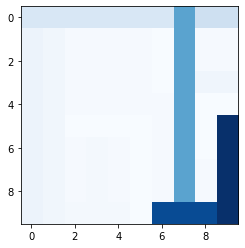

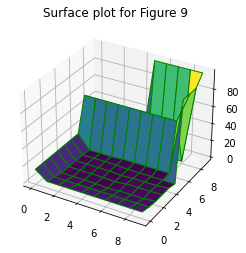

In [15]:
# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

region_action_scores = []
for learner in team.learners:
    if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
    else:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)
# print(sorted_region_action_scores)
# for record in sorted_region_action_scores:
#     print(record)
action_states = []
for record in sorted_region_action_scores:
    action = ''
    if record['action'] == 0:
        action = '\u2191'
    elif record['action'] == 1:
        action = '\u2193'
    elif record['action'] == 2:
        action = '\u2192'
    elif record['action'] == 3:
        action = '\u2190'

    for i in range(record['region'][3] - record['region'][2]+1):
        state = [0, 0]
        state[record['region'][0]] = record['region'][1]
        state[not record['region'][0]] = record['region'][2] + i
        
        # ensure we do not enter duplicate states
        found = 0
        for pair in action_states:
            if pair['state'] == (state[0], state[1]):
                found = 1
                
        if found == 0:
            action_states.append({'state': (state[0], state[1]), 'action': action, 'q': record['q'] })

# add in the rest of the states, either they are not visited, or illegal
for n in reversed(range(env.rows)):
    for m in range(env.cols):
        action = ''
        found = 0
        for record in action_states:
            if record['state'] == (n, m):
                found = 1
                action = record['action']
#                 action = float(round(record['q'], 0))
        if found == 0:
            if not env.check_legal((n, m)):
                action = 'X'
            else:
                action = '?'
        print(f'{action} ', end='')
    print('\n')
    

q_map = np.zeros((env.rows, env.cols))

# add in the rest of the states, either they are not visited, or illegal
for n in range(env.rows):
    for m in range(env.cols):
        action = ''
        found = 0
        for record in action_states:
            if record['state'] == (n, m):
                found = 1
                action = record['q']
        if found == 0:
            if not env.check_legal((n, m)):
                action = -1
            else:
                action = 0
        q_map[(env.rows-1)-n][m] = action

plt.imshow(q_map, cmap='Blues', interpolation='nearest')
plt.show()

x = []
y = []
for i in range(env.cols):
    x.append(i)
    y.append(i)

Y, X = np.meshgrid(x, y)

fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection ='3d')

# syntax for plotting
ax.plot_surface(X, Y, q_map, cmap ='viridis', edgecolor ='green')
ax.set_title(f'Surface plot for {envName}')
plt.show()

## Heatmap (RL)

In [16]:
region_action_scores = []
for learner in team.learners:
    if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
    else:
        region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)

state_counts = []

for n in reversed(range(env.rows)):
    for m in range(env.cols):
        state_count = 0
        for record in sorted_region_action_scores:
            for i in range(record['region'][3] - record['region'][2]+1):
                state = [0, 0]
                state[record['region'][0]] = record['region'][1]
                state[not record['region'][0]] = record['region'][2] + i

                if state == [n, m]:
                    state_count += 1
                # state count logic goes here
        state_counts.append({'state': (n, m), 'count': state_count})

for n in reversed(range(env.rows)):
    for m in range(env.cols):
        for record in state_counts:
            if (n, m) == record['state']:
                count = record['count']
                print(f'{count} ', end='')
    print('')

3 4 4 4 4 4 4 5 4 4 
3 1 0 0 0 0 0 3 1 0 
3 1 0 0 0 0 0 2 2 1 
3 1 0 0 0 0 0 3 1 1 
3 1 0 0 0 0 0 3 0 0 
3 1 0 0 0 0 0 3 0 1 
3 1 1 1 1 0 0 3 0 1 
3 2 1 2 2 0 0 3 0 1 
4 2 2 1 1 0 0 3 0 1 
5 3 3 3 3 0 1 3 1 1 


In [17]:
# print(team.gp_query_env)
print(gp_query_env)
print(rl_query_env)

7912
389
